In [4]:
%run 'openfiles.ipynb'

In [28]:
def calc_PCA(matriz_method,number_componentes):
    # Compute ICA:
    """
            Private method creating a vector image in a chosen folder
            Only for PCA
            #note that you need the variable " ordem " to desvector_patches
            Args:
            ----
            matriz_method (str): Method that will return a transformation
            of an matrix in array
            number_componentes(int): Number of components that will be used

            Returns:
            pesq(array 2D)
            -------        
    """
   
    pca = PCA(n_components=number_componentes)


    S_=pca.fit_transform(matriz_serpentina)  
    A_=pca.components_
    scores = pca.explained_variance_ratio_
    analysis_PCA(scores)
    
    #Convert the input to an array.
    myarray = np.asarray(S_)
    myarray2= (myarray-myarray.min())/(myarray.max()-myarray.min())
    #print scatter plot
    

    scatter_plot(myarray2)
    

    pesq2 = np.asarray(A_)
    
    pesq= (pesq2-pesq2.min())/(pesq2.max()-pesq2.min())

    return pesq 


In [6]:
def path_serpentina(number):
    #number=Number of components that were used in the function "calc_ICA"
    N=str(number)
    serpentina_path = home_path+'/BC1/analysis/'+data_region+'/PCA components/'+N+'_Components/serpentine_method'
    
    return serpentina_path

In [7]:
#Sets image size
def create_image_PCA(method,pesq):
    """
        Private method creating a vector image in a chosen folder
        Only for Fast ICA
        #note that you need the variable " ordem " to desvector_patches
        Args:
        ----
        method(string):Method that will be used to transform the matrix in 8 X 8
   
        pesq(array): Matrix returned by function "calc_ICA"
       
        Returns:
        Image
        -------
        
    """  
    number=pesq.shape[0]
    #Method to generate the images
    for lista in range(number):
        
        
        #Sets image size
        plt.figure(figsize=(15,15))
        plt.subplots(1,1)
    
        #Create the image
        if (method=='Serpentine'):
            #Use desvetor_serpentina in matshow
            plt.matshow(desvector_serpentina(pesq[lista]),cmap='YlGnBu', fignum=1,vmin=0, vmax=1)
            path=path_serpentina(number)
           
        if(method=='Patches'):
            #Use desvetor_serpentina in matshow
            plt.matshow(desvector_patches(ordem,pesq[lista]),cmap='YlGnBu', fignum=1,vmin=np.amin(pesq[lista]), vmax=np.amax(pesq[lista]))
            path=path_patches(number)
           
            
            
        X= str(lista+1)
        N=str(number)
        sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=0, vmax=1))
        sm._A = []
        cb=plt.colorbar(sm)
        cb.ax.tick_params(labelsize=15)
        tick_locator = ticker.MaxNLocator(nbins=5)
        cb.locator = tick_locator
        cb.update_ticks()
        
        #Sets image margins size
        
        #plt.xlabel('Smarts')
        #plt.ylabel('Probability')
        plt.title('Component '+X +' of '+str(number)+': PCA Method '+str(method) , fontsize = 25)
        #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
        
        plt.xticks([])
        plt.yticks([])
        #plt.axis('off')
        # hide tick and tick label of the big axes
        plt.xlabel("Pixels X",fontsize=20)
        plt.ylabel("Pixels Y",fontsize=20)

        #place to create the image
        

       
        plt.savefig(path+'/Components/component_'+N+'_image_'+X+'.png', bbox_inches='tight')
        
        plt.clf()
        
     

In [8]:
def analysis_PCA(scores):
    N=str(len(scores))
    plt.style.use('ggplot')
    dtype = [('Col1','int32')]
    index = [str(i) for i in range(1, len(scores)+1)]
    df = pd.DataFrame(scores*100, index=index)

    ax = df.plot(kind='bar', figsize=(10,7),color="coral", fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title("Variance of "+N+"_Components", fontsize=18)
    ax.set_ylabel("Percentage", fontsize=18);
    ax.set_xlabel("Principal Component", fontsize=18);
    ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.legend(["Sum " +str(round(np.sum(scores)*100,2))+"%"])
    
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())
    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, \
                str(round((i.get_height()), 2))+'%', fontsize=15,
                    color='dimgrey')
        

    path=path_serpentina(len(scores))
    
   
    plt.savefig(path+'/Analysis/component_'+N+'_image.png', bbox_inches='tight')  
    plt.clf()
    plt.close('all')
    

In [39]:
def scatter_plot(components,):
    plt.style.use('ggplot')
    plt.figure(figsize=(10,10))

    plt.plot(components[:,0],components[:,1],'o')

    plt.title('Scatter Plot PCA', fontsize = 25)
        #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

        #plt.axis('off')
        # hide tick and tick label of the big axes
    plt.xlabel("Principal Component 1",fontsize=20)
    plt.ylabel("Principal Component 2",fontsize=20)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    path=path_serpentina(len(components[0]))
    N=len(components[0])
    plt.savefig(path+'/Analysis/Scatter_Plot_'+str(N)+'_image.png', bbox_inches='tight') 
    plt.clf()
    plt.close('all')
    
    from mpl_toolkits.mplot3d import Axes3D


    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')




    ax.scatter(components[:,0], components[:,1], components[:,2])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    plt.savefig(path+'/Analysis/Scatter_Plot3D_'+str(N)+'_image.png', bbox_inches='tight') 
    plt.clf()
    plt.close('all')
    
    
    coordinates = np.dstack((components[:,0],components[:,1]))

    kmeans_components = KMeans(n_clusters=2, random_state=0).fit(coordinates[0])
    #print kmeans_components.labels_
    
    
    plt.figure(figsize=(12, 12))
    plt.scatter(coordinates[0,:,0],coordinates[0,:,1], c=kmeans_components.labels_.astype(float),s=50, cmap='viridis')
    plt.title('Scatter Plot PCA Kmeans', fontsize = 25)
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    
    #plt.axis('off')
    # hide tick and tick label of the big axes
    plt.xlabel("Principal Component 1",fontsize=20)
    plt.ylabel("Principal Component 2",fontsize=20)
    A=np.count_nonzero(kmeans_components.labels_ == 0)
    B=np.count_nonzero(kmeans_components.labels_ == 1)
    
    center =kmeans_components.cluster_centers_
    plt.scatter(center[:,0], center[:,1],  marker='x', c='r',label="Centers")
    
    plt.text(0.9, 0.7, str(A),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
    plt.text(0.1, 0.2, str(B),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 'x-large')
    
    plt.savefig(path+'/Analysis/Scatter_Plot_Kmeans'+str(N)+'_image.png', bbox_inches='tight') 
    plt.clf()
    plt.close('all')
    
    
    plt.figure(figsize=(12, 12))
    model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans',random_state=0)
    labels = model.fit_predict(coordinates[0])
    
    plt.title('Scatter Plot PCA SpectralClustering', fontsize = 25)
    plt.xlabel("Principal Component 1",fontsize=20)
    plt.ylabel("Principal Component 2",fontsize=20)
    plt.scatter(coordinates[0,:,0], coordinates[0,:,1], c=labels,s=50, cmap='viridis');
    
    A=np.count_nonzero(kmeans_components.labels_ == 0)
    print kmeans_components.labels_ 
    B=np.count_nonzero(kmeans_components.labels_ == 1)
    plt.text(0.9, 0.7, str(A),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
    plt.text(0.1, 0.2, str(B),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
    
    plt.savefig(path+'/Analysis/Scatter_Plot_SpectralClustering'+str(N)+'_image.png', bbox_inches='tight') 
    plt.clf()
    plt.close('all')
    

    
    if(len(components[0])==64):
        position0 = [i for i,x in enumerate(labels) if x == 0]
        position0 = np.array(position0).T
        position1 = [i for i,x in enumerate(labels) if x == 1]
        position1 = np.array(position1).T
        
        
        matrixcluster0=matriz_serpentina[position0]
        matrixcluster1=matriz_serpentina[position1]
        
        
        cluster0=np.array([])
        cluster1=np.array([])
        for i in range(64):
            if matrixcluster0[:,i].sum()>=matrixcluster1[:,i].sum():
                cluster0=np.append(cluster0,i)
            else:
                cluster1=np.append(cluster1,i)
        cluster0=cluster0.astype(int)
        cluster1=cluster1.astype(int)
        
        
        plt.figure(figsize=(15,10))
        plt.plot(matriz_serpentina)
        # hide tick and tick label of the big axes
        plt.title('Data TMP Channels', fontsize = 20)
        plt.xlim(0,146)
        plt.ylim(-10, 1000)
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Data TMP Channel.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        plt.figure(figsize=(15,10))
        plt.plot(matrixcluster0)
        # hide tick and tick label of the big axes
        plt.title('Clustering Data TMP Channels Part 1', fontsize = 20)
        plt.xlim(0,146)
        plt.ylim(-10, 1000)
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data TMP Part 1.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')

        plt.figure(figsize=(15,10))
        plt.plot(matrixcluster1)
        # hide tick and tick label of the big axes
        plt.title('Clustering Data TMP Channels Part 2', fontsize = 20)
        plt.xlim(0,146)
        plt.ylim(-10, 1000)
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data TMP Part 2.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        plt.figure(figsize=(15,10))
        plt.plot(matriz_serpentina[:,cluster0])
        # hide tick and tick label of the big axes
        plt.title('Clustering Data TMP Channels Part 1', fontsize = 20)
        plt.xlim(0,146)
        plt.ylim(-10, 1000)
        plt.text(1.2, 955, "Number of Channels = "+str(len(cluster0)),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data TMP Part Channels 1.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        
        plt.figure(figsize=(15,10))
        plt.plot(matriz_serpentina[:,cluster1])
        # hide tick and tick label of the big axes
        plt.title('Clustering Data TMP Channels Part 2', fontsize = 20)
        plt.xlim(0,146)
        plt.ylim(-10, 1000)
        plt.text(1.2, 955, "Number of Channels = "+str(len(cluster1)),size=20,bbox=dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data TMP Part Channels 2.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        plt.figure(figsize=(15,10))
        plt.plot(return_matrix(matrixcluster0,0))
        plt.xlim(0,146)
        plt.ylim(0, 1700)
        plt.title('Clustering Data Part 1', fontsize = 20) 
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data Part 1.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        plt.figure(figsize=(15,10))
        plt.plot(return_matrix(matrixcluster1,1))
        plt.xlim(0,146)
        plt.ylim(0, 1700)
        plt.title('Clustering Data Part 2', fontsize = 20)
        plt.xlabel("Triggers",fontsize=15)
        plt.ylabel("ADC Counts",fontsize=15)
        plt.savefig(path+'/Analysis/Clustering Data Part 2.png', bbox_inches='tight') 
        plt.clf()
        plt.close('all')
        
        
        
        
  
        


In [40]:
def return_matrix(matriz_serpentina,number):
    for i in range(matriz_serpentina.shape[0]):


        if (i==0):
            #Used to initialize matriz_serpentina to avoid error in vstack
            matriz = desmap(desvector_serpentina(matriz_serpentina[i]),map_path,object_file["data"][i],number)
        else:
            #Stack arrays in sequence vertically (row wise).
            matriz = np.vstack((  matriz, desmap(desvector_serpentina(matriz_serpentina[i]),map_path,object_file["data"][i],number)  ))
    return matriz

In [41]:
def desmap(data_per_idx,map_file,data,part):

    # get mapping for image pixels
    pixel_map = np.loadtxt(map_file)
    index=np.array([])
    data_matrix = np.zeros(64)

    for i in range(8):
        for j in range(8):
            if pixel_map[i, j] == 0:
                continue
            else:
                data_matrix[int(pixel_map[i,j])] = data_per_idx[i,j]
    if (part==0):
        data_matrix[7]=data[6]
        data_matrix[8]=data[7]
        data_matrix[33]=data[32]
    index = np.argwhere(data_matrix==0)
    data_matrix= np.delete(data_matrix, index)
    return data_matrix

In [42]:
#Path to the channel reading mapping file
map_path = home_path+'/processed_data/cs10288/mapping.txt'

In [26]:
#For 64 Components
components64=calc_PCA('Serpentine',64)


print "Components 64"

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


NameError: global name 'object_file' is not defined

In [26]:
#For 03 Components
components03=calc_PCA('Serpentine',3)
create_image_PCA("Serpentine",components03) 
plt.close('all')
print "Components 03"


Components 03


In [43]:
#For 04 Components
components04=calc_PCA('Serpentine',4)
#create_image_PCA("Serpentine",components04) 
#plt.close('all')
print "Components 04"

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Components 04


In [10]:
#For 05 Components
components05=calc_PCA('Serpentine',5)
#create_image_PCA("Serpentine",components05) 
#plt.close('all')
print "Components 05"

Components 05


In [11]:
#For 06 Components
components06=calc_PCA('Serpentine',6)
#create_image_PCA("Serpentine",components06) 
#plt.close('all')
print "Components 06"

Components 06


In [12]:
#For 07 Components
components07=calc_PCA('Serpentine',7)
#create_image_PCA("Serpentine",components07) 
#plt.close('all')
print "Components 07"

Components 07


In [13]:
#For 08 Components
components08=calc_PCA('Serpentine',8)
#create_image_PCA("Serpentine",components08) 
#plt.close('all')
print "Components 08"

Components 08


In [27]:
#For 09 Components
components09=calc_PCA('Serpentine',9)
#create_image_PCA("Serpentine",components09) 
#plt.close('all')
print "Components 09"

Components 09


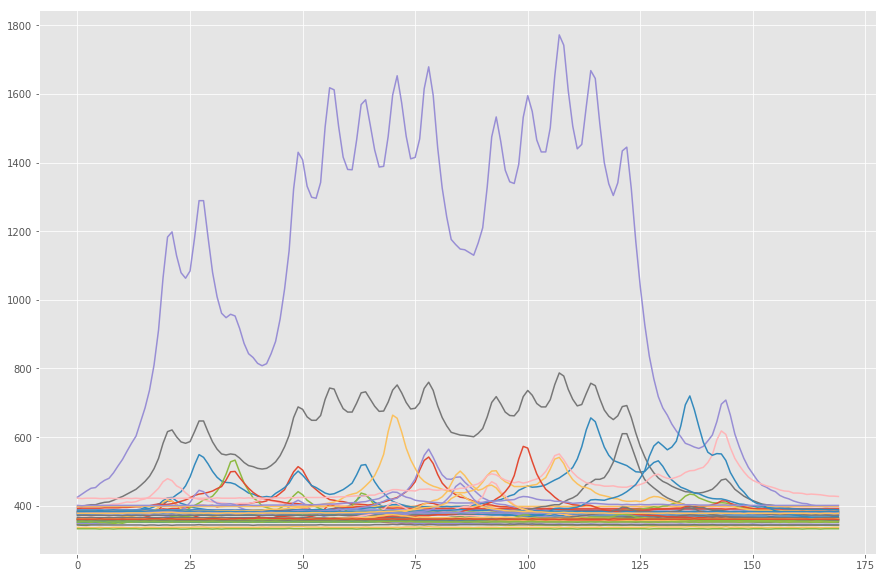

In [10]:
plt.plot(separate_peaks[0])
plt.show()